In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
import json
from PIL import *
from matplotlib import *

In [3]:
PATH = untar_data(URLs.PASCAL_2007)
PATH.ls()

[PosixPath('/home/jupyter/.fastai/data/pascal_2007/test.json'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/tmp'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/test'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/train.json'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/valid.json'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/train')]

In [4]:
trn_j = json.load((PATH/'train.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [5]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

In [6]:
trn_j[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [7]:
trn_j[CATEGORIES][:4]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'}]

In [8]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [9]:
IMG_PATH = PATH/'train'
IMG_PATH

PosixPath('/home/jupyter/.fastai/data/pascal_2007/train')

In [10]:
JPEGS = get_image_files(IMG_PATH)

In [11]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [12]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [13]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [14]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [15]:
cats[7]

'car'

In [16]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [17]:
cats[15],cats[13]

('person', 'horse')

In [18]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [19]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [20]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [21]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

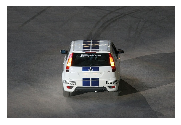

In [22]:
im.show()

In [23]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    im.show(ax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [24]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [25]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [26]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

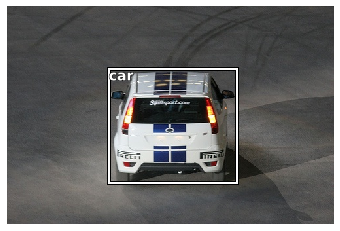

In [27]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [28]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [29]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

torch.Size([3, 364, 480])


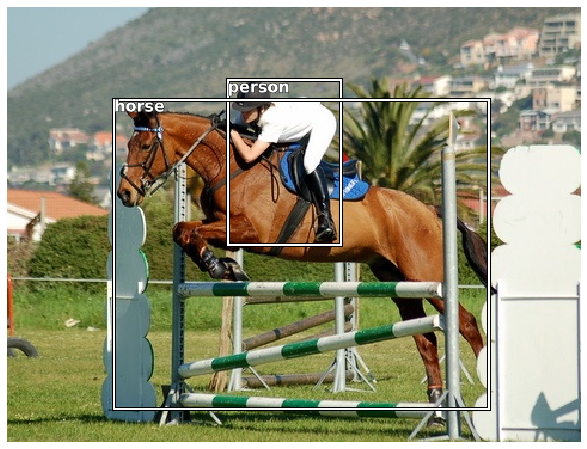

In [30]:
draw_idx(17)

In [31]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [32]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

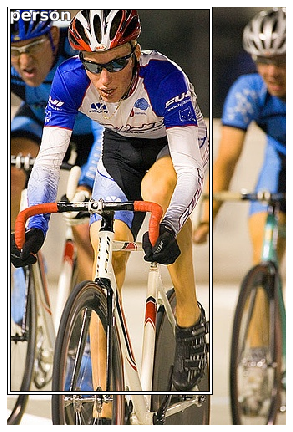

In [33]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [34]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [35]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

In [36]:
df.head()

,fn,cat
0,000012.jpg,car
1,000017.jpg,horse
2,000023.jpg,person
3,000026.jpg,car
4,000032.jpg,aeroplane


In [37]:
f_model = models.resnet34
sz=224
bs=64

In [38]:
tfms = get_transforms(max_warp=0., max_zoom=0.)
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)])

In [39]:

md = (ImageList.from_df(df, IMG_PATH) 
        .split_by_rand_pct()          
        .label_from_df()            
        .add_test_folder()          
        .transform(tfms, size=sz, resize_method=ResizeMethod.SQUISH)       
        .databunch(bs=bs))               

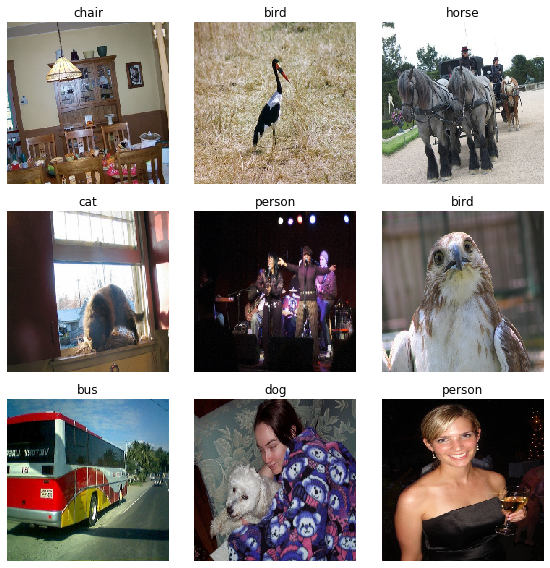

In [40]:
md.show_batch(rows=3, figsize=(8, 8))

In [41]:
learner = cnn_learner(md, models.resnet34, pretrained=True, wd=1e-1, 
                      metrics=[accuracy], callback_fns=[ShowGraph])

In [42]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-03
Min loss divided by 10: 8.32E-03


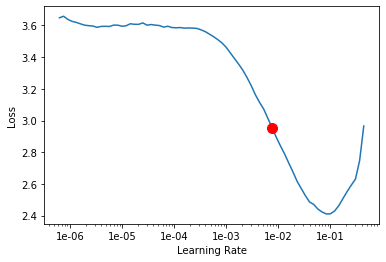

In [43]:
learner.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,1.731259,0.851446,0.726000,00:12
1,1.049689,0.776120,0.764000,00:11
2,0.716192,0.693308,0.792000,00:12


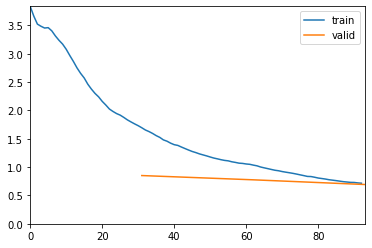

In [44]:
learner.fit_one_cycle(3, max_lr=6e-3)

In [45]:
learner.save('13a-object-detection-single-1')

In [46]:
learner.load('13a-object-detection-single-1');

In [47]:
learner.unfreeze()

In [48]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-06
Min loss divided by 10: 3.98E-05


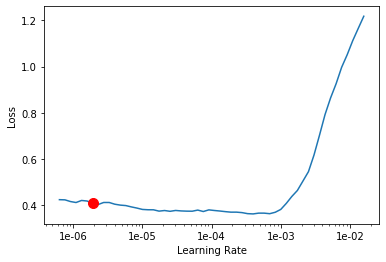

In [49]:
learner.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.392582,0.678288,0.800000,00:15
1,0.363260,0.683645,0.802000,00:15
2,0.305209,0.676474,0.796000,00:15
3,0.246096,0.690982,0.806000,00:15
4,0.202355,0.677147,0.812000,00:15
5,0.174006,0.680159,0.818000,00:15


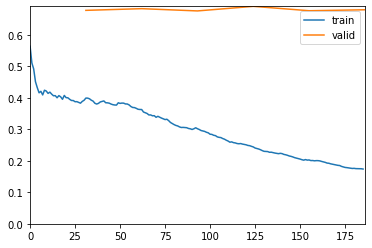

In [50]:
learner.fit_one_cycle(6, max_lr=slice(3e-6, 3e-4))

In [51]:
learner.save('13a-object-detection-single-2')

In [52]:
learner.load('13a-object-detection-single-2');